In [49]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error


In [63]:
SP = pd.read_csv('SP_Data.csv', index_col='Date', parse_dates=['Date'])
SP=SP["2000":"2019"]
SP.to_csv("Data_SP500_MAP565_2000_2019.csv")
SP.head()

,High,Low,Open,Close,Volume,Adj Close,Name
Date,,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,^GSPC
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,^GSPC
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,^GSPC
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,^GSPC
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971,^GSPC


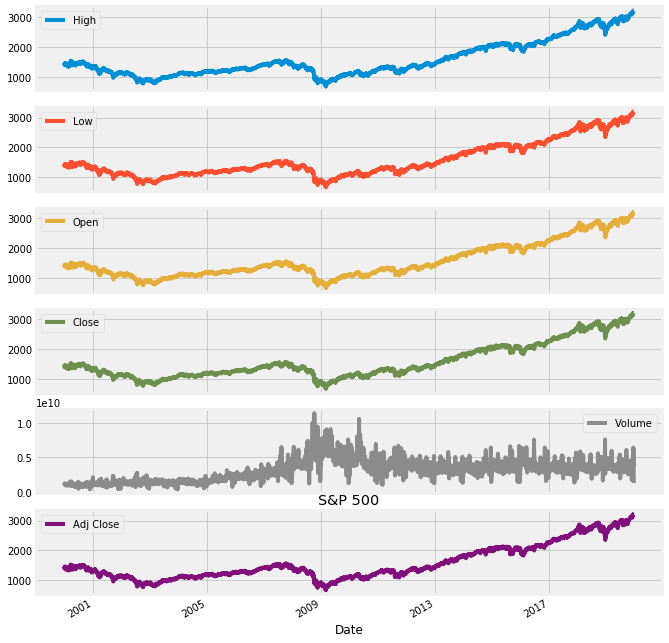

In [51]:
SP['2000':'2019'].plot(subplots=True, figsize=(10,12))
plt.title('S&P 500')
plt.legend()
plt.savefig('stocks_opeb_2000_2019.png')
plt.show()

Percent change:

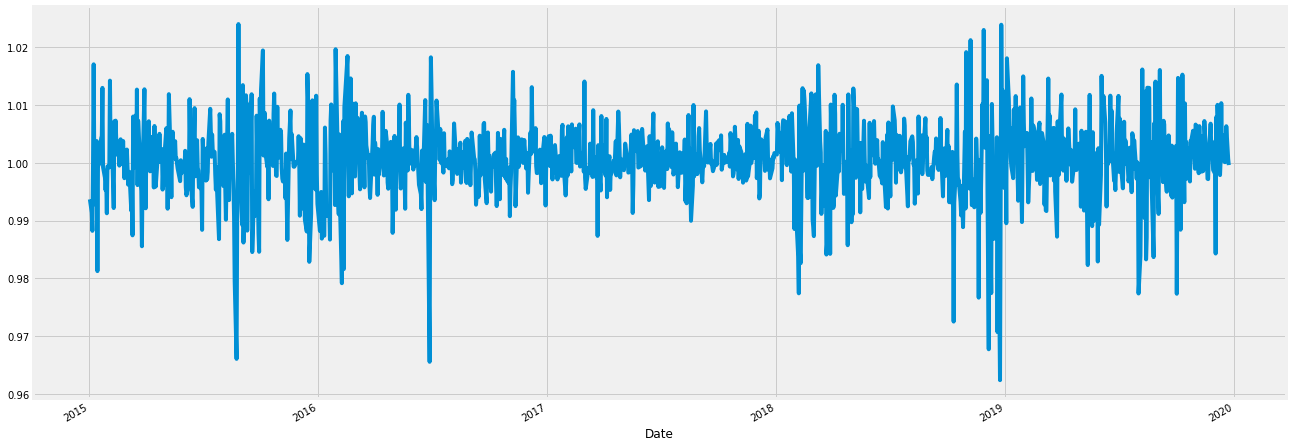

In [52]:
SP['Change'] = SP.High.div(SP.High.shift())
SP['Change']['2015':'2019'].plot(figsize=(20,8))
plt.show()

Stock returns:

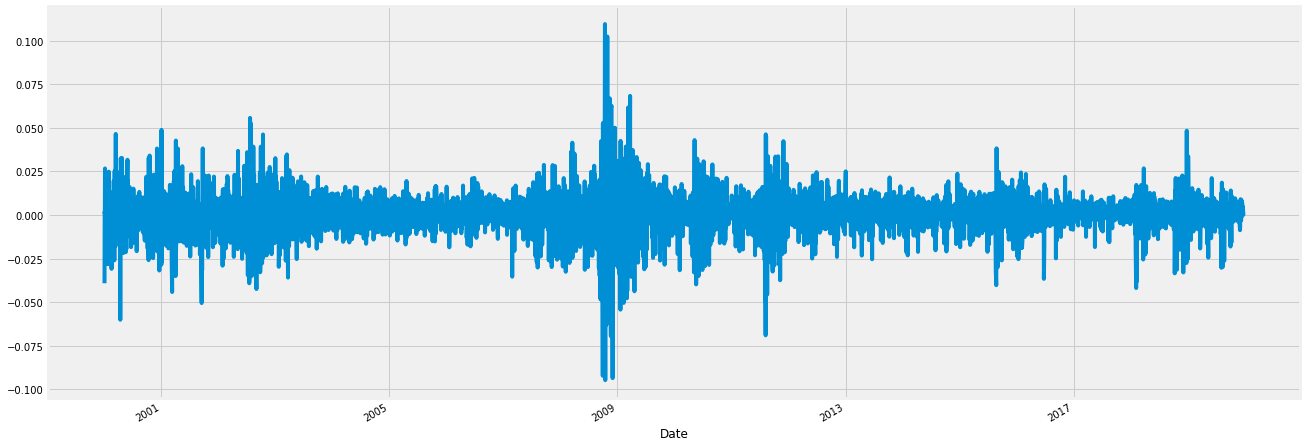

In [64]:
SP['logreturn'] = np.log(SP["Adj Close"]/SP["Adj Close"].shift(1)).dropna()
data=SP['logreturn']['2000':'2019']
SP['logreturn']['2000':'2019'].plot(figsize=(20,8))
plt.savefig('logreturns.png')
plt.show()

In [65]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0),colspan=2)
        #pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        #scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

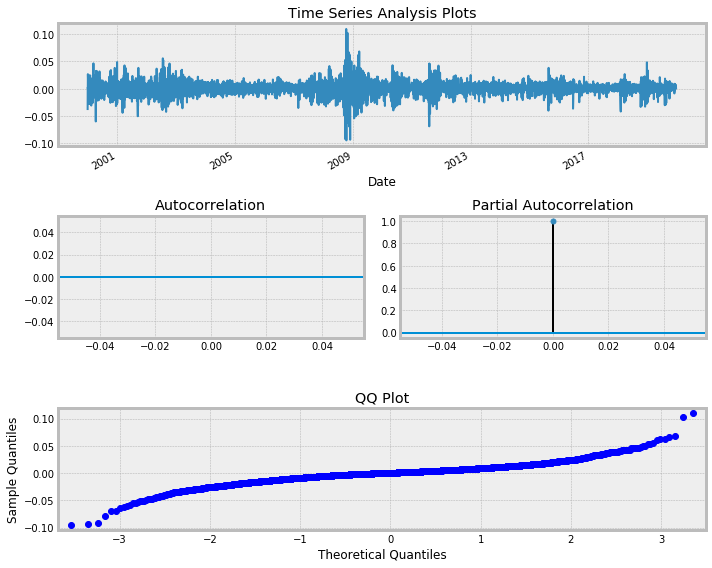

In [68]:
_ = tsplot(SP.logreturn, lags=30)
plt.savefig('acf_pacf_log.png')


Change in successful days:

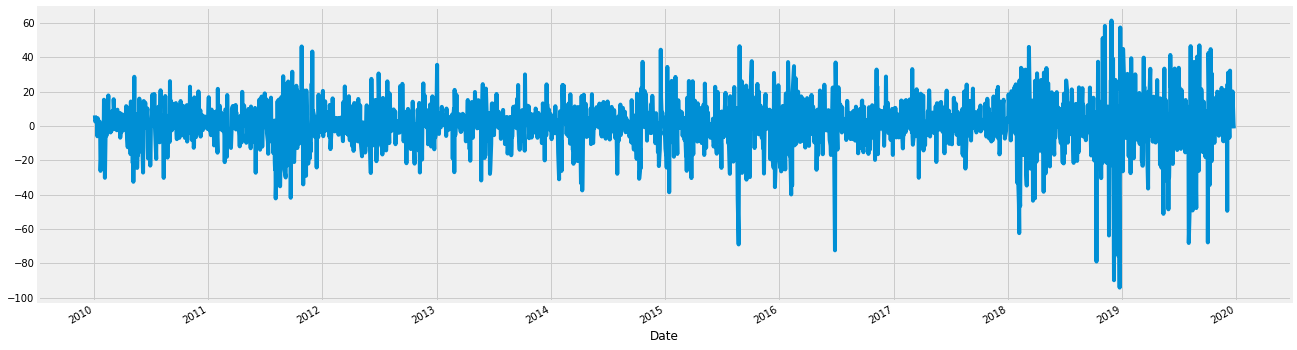

In [10]:
SP.High.diff()['2010':'2019'].plot(figsize=(20,6))
plt.show()

Rolling by mean:

In [60]:
rolling_SP

Date
1975-01-02      70.919998
1975-01-03      71.279999
1975-01-06      71.599998
1975-01-07      71.637499
1975-01-08      71.615999
                 ...     
2019-12-18    3173.542511
2019-12-19    3180.618744
2019-12-20    3191.059967
2019-12-23    3208.886637
2019-12-24    3211.392822
Name: High, Length: 11346, dtype: float64

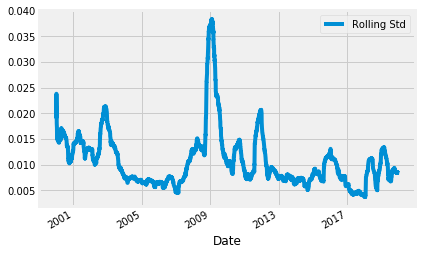

In [33]:
# Rolling window functions

plt.figure(1)
rolling_SP1 = SP['logreturn']['2000':'2019'].rolling('150D').std()
rolling_SP1.plot()
plt.legend(['Rolling Std'])
plt.savefig('rolling_std.png')

plt.show()

Expanding Functions:

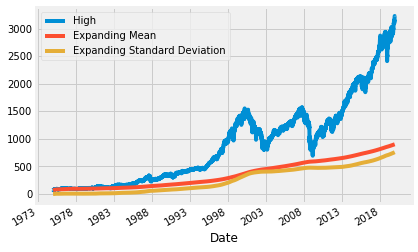

In [55]:
SP_mean = SP.High.expanding().mean()
SP_std = SP.High.expanding().std()
SP.High.plot()
SP_mean.plot()
SP_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

In [50]:
SP.High.expanding().std().head()

Date
1975-01-02         NaN
1975-01-03    0.509118
1975-01-06    0.660908
1975-01-07    0.544816
1975-01-08    0.474268
Name: High, dtype: float64

In [51]:
SP.High.expanding().mean().head()

Date
1975-01-02    70.919998
1975-01-03    71.279999
1975-01-06    71.599998
1975-01-07    71.637499
1975-01-08    71.615999
Name: High, dtype: float64

OHLC Chart:

In [57]:
trace = go.Ohlc(x=SP['12-2019'].index,
                open=SP['12-2019'].Open,
                high=SP['12-2019'].High,
                low=SP['12-2019'].Low,
                close=SP['12-2019'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [58]:
# OHLC chart of 2019
trace = go.Ohlc(x=SP['2019'].index,
                open=SP['2019'].Open,
                high=SP['2019'].High,
                low=SP['2019'].Low,
                close=SP['2019'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

Candlestick
$x=\frac{1}{1+x^2}$

In [74]:
trace = go.Candlestick(x=SP['12-2019'].index,
                open=SP['12-2019'].Open,
                high=SP['12-2019'].High,
                low=SP['12-2019'].Low,
                close=SP['12-2019'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

Autocorrelation:

In [ ]:
plot_acf(SP["Close"],lags=5000,title="Close prices Autocorrelations")
plt.show()

This estimated autocorrelation function proves the non-stationarity of our S&P 500.

Partial autocorrelation

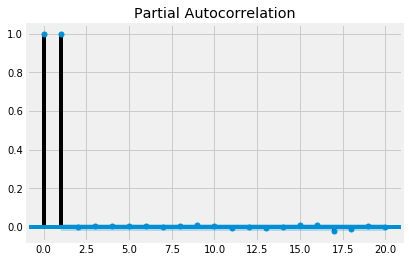

In [93]:
plot_pacf(SP["Open"],lags=20)
plt.show()

Trends, seasonality and noise

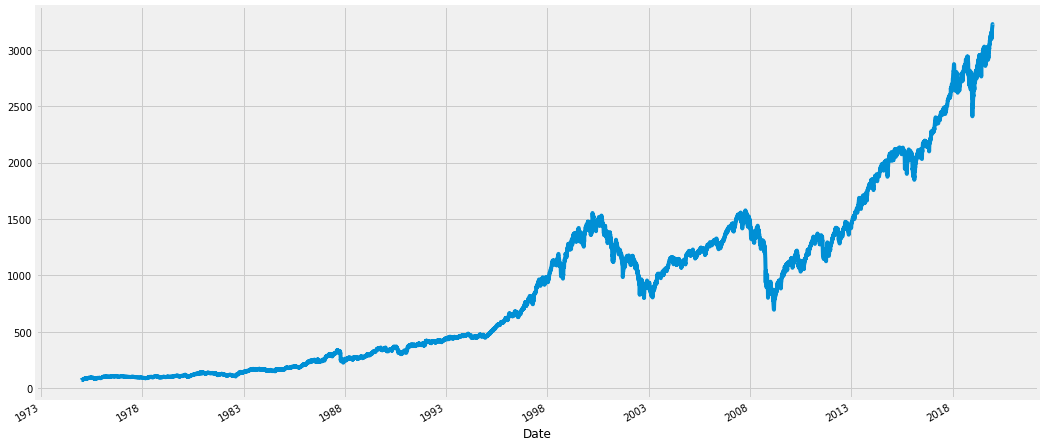

In [95]:
SP["High"].plot(figsize=(16,8))
plt.show()


Seasonal decomposition using moving averages.



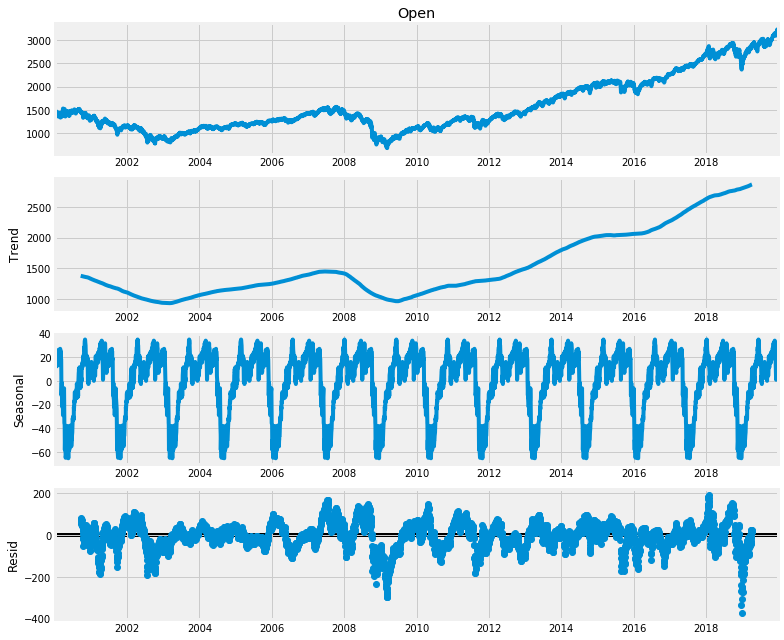

In [45]:
rcParams['figure.figsize'] = 11, 9
decomposed_SP_volume = sm.tsa.seasonal_decompose(SP["Open"]["2000":"2019"],freq=360) # The frequncy is annual
figure = decomposed_SP_volume.plot()
plt.savefig("decomosition serie open")
plt.show()